# Assignment - 1

In [1]:
# Import numpy library
import numpy as np
# Import matplotlib
import matplotlib.pyplot as plt
# Import pandas for excel file
import pandas as pd

# after converting given xls as csv
concrete_df = pd.read_excel(r"Concrete_Data.xls")

concrete_df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


## a. Plot `y` against each feature

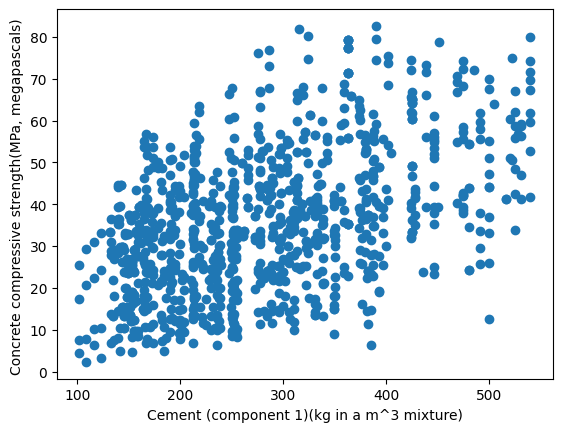

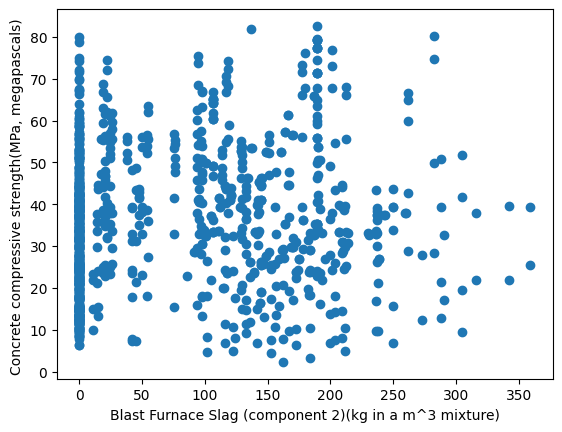

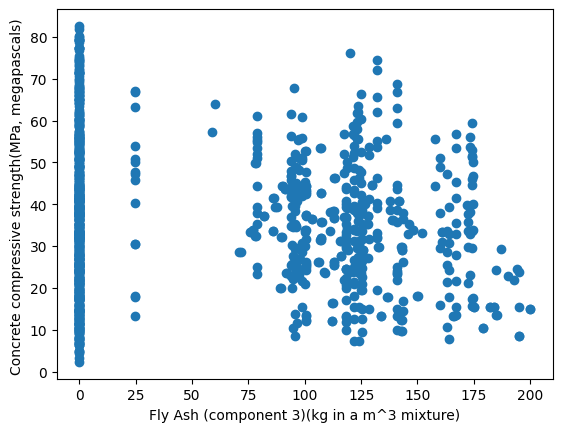

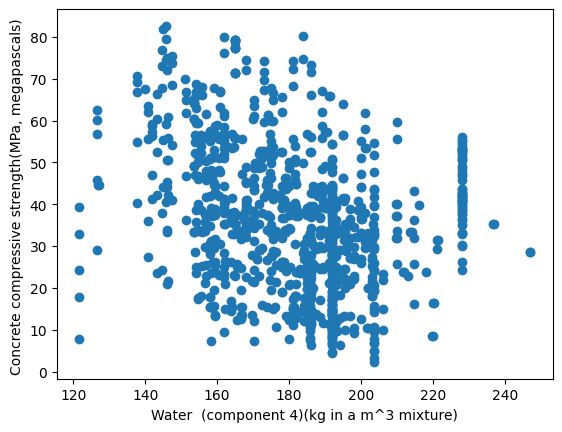

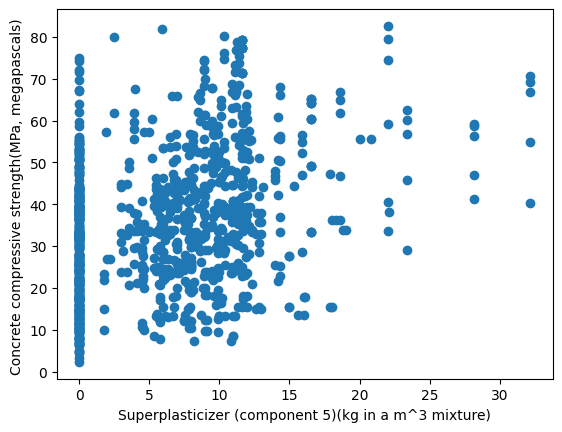

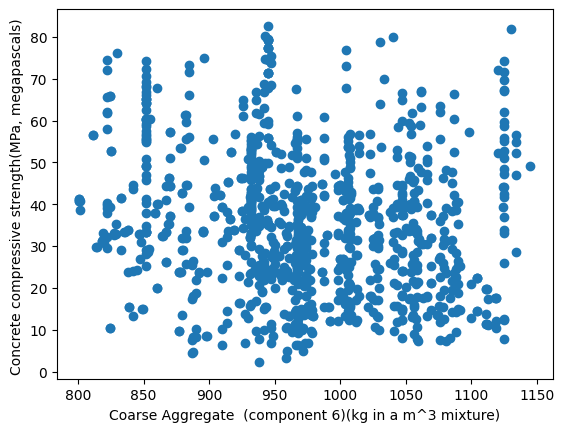

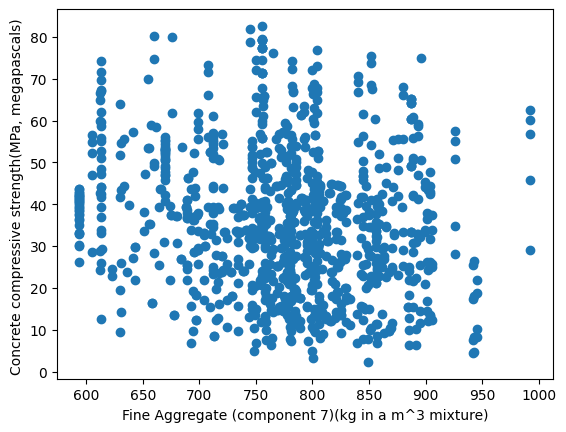

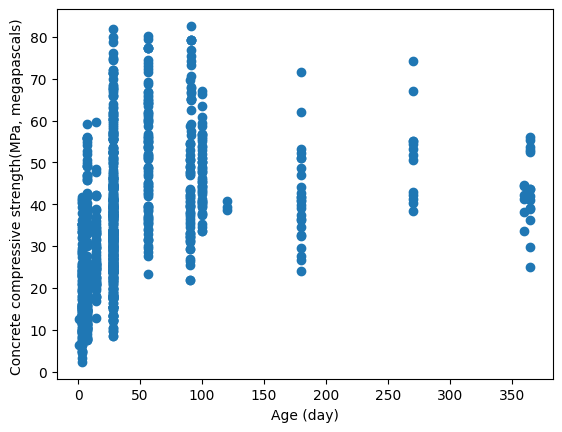

In [2]:
# Getting the names of the columns
column_names = concrete_df.columns

# loop through all columns and plot against target
for i in range(len(column_names) - 1) :
    # x - column i, y - target
    plt.scatter(concrete_df[column_names[i]], concrete_df[column_names[-1]])
    # Add the x - axis label as column_name[i]
    plt.xlabel(column_names[i])
    # Add the y - axis label as column_name[-1]
    plt.ylabel(column_names[-1])
    # show the plot
    plt.show()

### Choosing cement component as the important feature

## b. Formulate the cost function

In [3]:
def cost_function(w: float, b: float, df: pd.DataFrame) -> float:
    """calculate value of cost function J for given parameter vector and dataframe

    Args:
        w (np.array): parameter vector
        df (pd.DataFrame): data set

    Returns:
        float: cost
    """
    # m - no. of rows in data frame
    m, n = df.shape
    print(m, n)

    cost = 0

    # go through every row
    for i in range(m):
        # x_i - ith feauture input
        x_i = df.iloc[i, 0]
        # y_i - ith target
        y_i = df.iloc[i, -1]

        # add square of {prediction - target_value} ** 2
        cost += ((w * x_i + b) - y_i) ** 2

    # divide by 2 * m
    cost = cost / (2 * m)

    return cost

## c. Gradient Descent

In [4]:
def gradient_descent(x: np.array, y: np.array, learning_rate: float, iter: int) -> (float, float):
    """Applies the gradient descent algorithm

    Args:
        x (np.array):           input feature column
        y (np.array):           target feature column
        learning_rate (float):  Learning Rate
        iter (int):             No. of iterations

    """

    # t = t - a * dj_dt
    w, b = 0.0, 0.0

    # cost vs iterations
    cost_iter = np.zeros(iter)
    w_list = []
    b_list = []
    
    # leave last 10 rows for testing
    m = x.shape[0] - 10
    
    for _ in range(iter) :

        y_prediction = w * x + b

        cost_iter[_] = np.sum((y_prediction - y) ** 2) / (2 * m)

        dj_dw = np.sum((y_prediction - y) * x) / (2 * m)
        dj_db = np.sum((y_prediction - y)) / 2 * m

        w_list.append(w)
        b_list.append(b)

        w = w - (learning_rate * dj_dw)
        b = b - (learning_rate * dj_db)
    
    # Plot the results
    plt.plot(cost_iter)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Training Curve")
    plt.show()

    plt.plot(w_list, cost_iter)
    plt.title("weight vector curve")
    plt.ylabel("Cost")
    plt.xlabel("parameter w")
    plt.show()
    
    return w, b

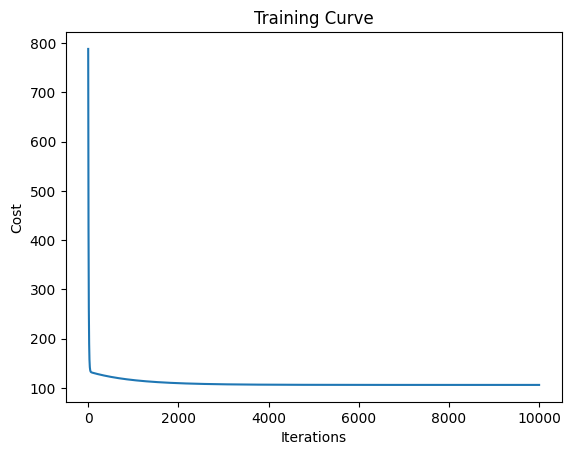

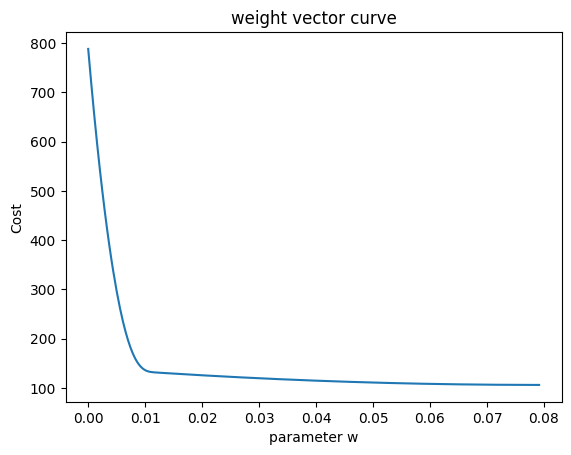

In [5]:
x = np.array(concrete_df.iloc[:, 0])
y = np.array(concrete_df.iloc[:, -1])

w, b = gradient_descent(x, y, 0.0000001, 10000)

## f.  Check with testing data

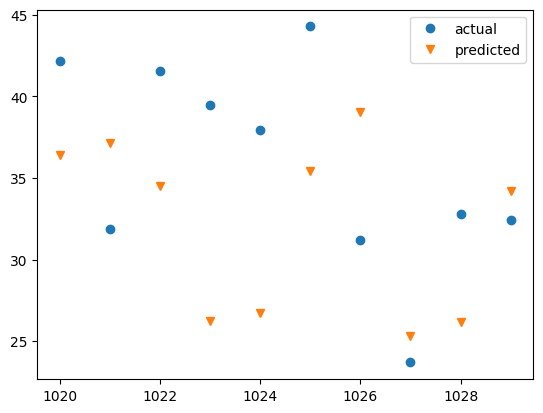

1020    42.140084
1021    31.875165
1022    41.542308
1023    39.455954
1024    37.917043
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64



1020    36.391658
1021    37.167403
1022    34.499791
1023    26.211989
1024    26.702767
1025    35.441767
1026    39.067185
1027    25.317508
1028    26.156579
1029    34.214824
Name: Cement (component 1)(kg in a m^3 mixture), dtype: float64

In [6]:
# test the model
test = concrete_df.tail(10)
test_x = test[column_names[0]]
test_y = test[column_names[-1]]

predicted_y = w * test_x + b

plt.plot(test_y, 'o', label = 'actual')
plt.plot(predicted_y, 'v', label = 'predicted')
plt.legend()
plt.show()

print(test_y)
print()
predicted_y